In [1]:
%run '/mnt/berger2/equipes/IGE/meom/workdir/berger2/fonctions/meom_fonctions/fonctions.ipynb'

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.netcdf as netcdf
import qgutils as qg
from matplotlib import ticker, cm
plt.ion()

In [2]:
#paramètres gravés dans le marbre pour le stage

Delta = 10000                               #grid spacing
f0 = 9.37456E-05                           #paramètre de Coriolis
dh = np.array([350,750,2900])              #hauteurs des couches océaniques
dh_b = np.array([(dh[0]+dh[1])/2,(dh[0]+dh[1])/2])
g_prime = np.array([2.5E-02,1.25E-02])     #gravités réduites aux interfaces
Beta = 1.75360E-11
delta_ek = 5                               #ocean bottom Ekman thickness 
nu4 = 2E09                                 #bi-harmonic viscosity
Ht = np.sum(dh)
Ht_b = np.sum(dh_b)
toc = np.array([1.31693E+01,1.81693E+01,2.41693E+01])
bf = delta_ek*f0/(2*dh[-1])

#fréquences Brunt-vaisala

N_12 = g_prime[0]/((dh[0]+dh[1])/2)
N_23 = g_prime[1]/((dh[1]+dh[2])/2)
N2 = np.array([N_12,N_23])

#densité

rho1= 1000
rho2= 1000*(1-g_prime[0]/9.81)
rho3= rho2 - 1000*g_prime[1]/9.81

rho = np.array([rho1,rho2,rho3])

In [3]:
dir0  = '/mnt/berger2/equipes/IGE/meom/workdir/berger2/qgcm-data/double_gyre_coupled/outdata_6/'
dir1 = '/mnt/berger2/equipes/IGE/meom/workdir/berger2/qgcm-data/double_gyre_coupled/outdata_9tdiff/'
file0 = 'ocpo.nc'
file1 = 'ocsst.nc'
file_at = 'atpa.nc'

In [4]:
#get fields psi
pfile_abs = dir0 + file0
pfile_rel = dir1 + file0

at_file = dir1 + file_at
#wind forcing
forcing_z = dir0 + file1

#buyoancy forcing
forcing_b_abs = dir0 + file1
forcing_b_rel = dir1 + file1

f1 = netcdf.netcdf_file(dir0 + file0,'r')
f2 = netcdf.netcdf_file(dir0 + file1,'r')

xp = f1.variables['xp'][:-1].copy()
yp = f1.variables['xp'][:-1].copy()
zp = f1.variables['z'][:].copy()

In [5]:
flot_me_et = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_abs/etapes_flot_moyen_abs.npz')
#b_me= integral_z(flot_me_et['b_me'], dh_b, Delta, Ht_b)
b_me_abs= flot_me_et['b_me']
p_me_abs = flot_me_et['p_me']

flot_me_abs = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_abs/termes_perturbation_abs.npz')
e_diab_abs = flot_me_abs['e_diab_p_me']

flot_me_rel = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_rel/termes_perturbation_rel.npz')
e_diab_rel = flot_me_rel['e_diab_p_me']


flot_me_et_rel = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_rel/etapes_flot_moyen_rel.npz')
p_me_rel = flot_me_et_rel['p_me']
b_me_rel = flot_me_et_rel['b_me']

flot_me_rel = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_rel/termes_flot_moyen_rel.npz')
u_me_rel = flot_me_rel['u_me']

diab = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/plots_exp/tableaux/termes_for_th.npz')
sst_me_abs = diab['sst_me_abs']
w_ek_me_abs = diab['w_ek_me_abs']
sst_me_rel= diab['sst_me_rel']
w_ek_me_rel= diab['w_ek_me_rel']
test_abs_sec = diab['test_abs_sec']
test_rel_sec = diab['test_rel_sec']
test_abs_prim = diab['test_abs_prim']
test_rel_prim = diab['test_rel_prim']
cov_abs_i = diab['cov_abs_i']
cov_rel_i = diab['cov_rel_i']


diab2 = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/plots_exp/tableaux/termes_for_th2.npz')
diab_solo_me_abs = diab2['diab_solo_me_abs']
diab_solo_me_rel = diab2['diab_solo_me_rel']




In [6]:
N2,f0 = qg.reshape3d(dh,N2,f0)

si_t = f1.variables['time'][:].copy().size

p = qg.read_qgcm(pfile_abs, 0, var='p', rescale = 1/f0, interp = True, subtract_bc = False )
nl,N,naux = p.shape

p_at = qg.read_qgcm(at_file, 0, var='p', rescale = 1/f0, interp = True, subtract_bc = False )
nl_at,N_at,naux_at = p_at.shape

test = si_t

average = True

In [7]:
# snapshot terme diabatique sans multiplication par b' (calcul)
sst_abs = qg.read_qgcm(forcing_b_abs, 50, 'sst',rescale = 1, interp=False)
w_ek_abs = qg.read_qgcm(forcing_b_abs, 50, 'wekt',rescale = 1, interp=False)
    
sst_rel = qg.read_qgcm(forcing_b_rel, 50, 'sst',rescale = 1, interp=False)
w_ek_rel = qg.read_qgcm(forcing_b_rel, 50, 'wekt',rescale = 1, interp=False)

diab_solo_p_abs = w_ek_abs*(sst_me_abs-toc[0])/(toc[0]-toc[1]) - diab_solo_me_abs
diab_solo_p_rel = w_ek_rel*(sst_me_rel-toc[0])/(toc[0]-toc[1]) - diab_solo_me_rel



In [9]:
p_abs = qg.read_qgcm(pfile_abs, 50, var='p', rescale = 1/f0, interp = True, subtract_bc = False)
p_rel = qg.read_qgcm(pfile_rel, 50, var='p', rescale = 1/f0, interp = True, subtract_bc = False)

p_p_abs = p_abs - p_me_abs
p_p_rel = p_rel - p_me_rel 
    
b_abs = qg.p2b(p_abs, dh, f0)
b_rel = qg.p2b(p_rel, dh, f0)
    
b_p_abs = b_abs - b_me_abs
b_p_rel = b_rel - b_me_rel

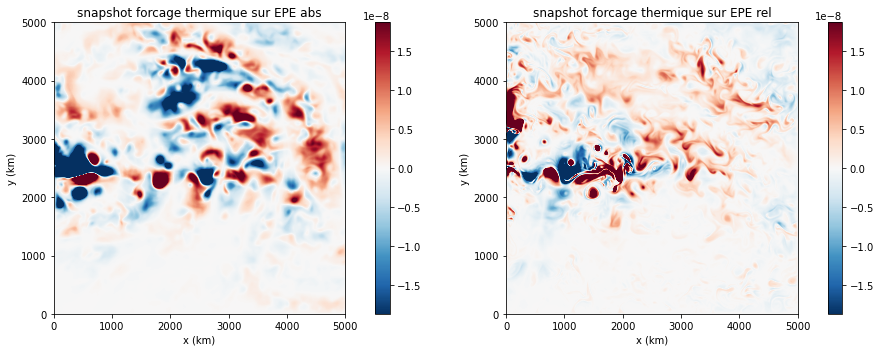

In [10]:
# snapshot forcage diabatique sur les perturbations

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5),tight_layout=True)

maxi = max(np.max(diab_solo_p_abs*b_p_abs[0]),np.abs(np.min(diab_solo_p_abs*b_p_abs[0])))

col1 = ax1.imshow( diab_solo_p_abs*b_p_abs[0], cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi/12, vmin = -maxi/12)
ax1.set_aspect('equal')
ax1.set_title('snapshot forcage thermique sur EPE abs')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')
m1 = plt.cm.ScalarMappable(cmap='RdBu_r')
m1.set_array(diab_solo_p_abs*b_p_abs[0])
m1.set_clim(-maxi/12, maxi/12)
plt.colorbar(m1, ax= ax1 )#.set_label(r'$m^2.s^{-3}$')

col2 = ax2.imshow(diab_solo_p_rel*b_p_rel[0], cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi/12, vmin = -maxi/12)
ax2.set_aspect('equal')
ax2.set_title('snapshot forcage thermique sur EPE rel')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')
m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(diab_solo_p_rel*b_p_rel[0])
m2.set_clim(-maxi/12, maxi/12)
plt.colorbar(m2, ax= ax2 )


plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/plots_exp/figure_epe_p/snapshot_diab_p.png')

In [11]:
p_p_abs_b = np.array([(p_p_abs[0]+p_p_abs[1])/2, (p_p_abs[2]+p_p_abs[1])/2])
p_p_rel_b = np.array([(p_p_rel[0]+p_p_rel[1])/2, (p_p_rel[2]+p_p_rel[1])/2])

rect_abs = (-1/N2)*b_me_abs*qg.jacobian(p_p_abs_b,b_p_abs, Delta)
rect_rel = (-1/N2)*b_me_rel*qg.jacobian(p_p_rel_b,b_p_rel, Delta)



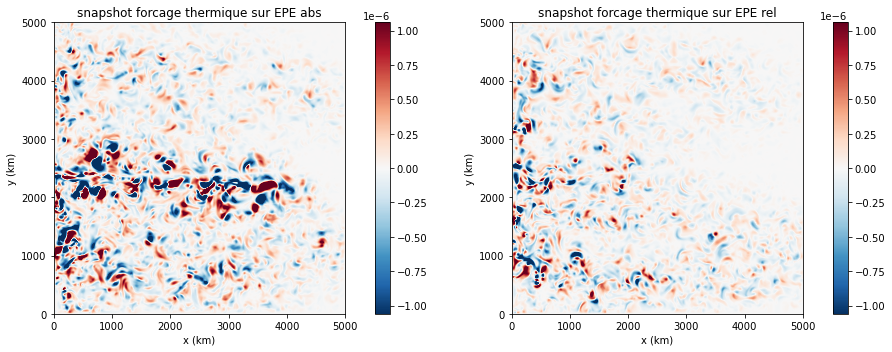

In [24]:
# snapshot rectification


fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5),tight_layout=True)

maxi = max(np.max(rect_abs[0]),np.abs(np.min(rect_abs[0])))

col1 = ax1.imshow( rect_abs[0], cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi/8, vmin = -maxi/8)
ax1.set_aspect('equal')
ax1.set_title('snapshot forcage thermique sur EPE abs')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')
m1 = plt.cm.ScalarMappable(cmap='RdBu_r')
m1.set_array(rect_abs[0])
m1.set_clim(-maxi/8, maxi/8)
plt.colorbar(m1, ax= ax1 )#.set_label(r'$m^2.s^{-3}$')

col2 = ax2.imshow(rect_rel[0], cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi/8, vmin = -maxi/8)
ax2.set_aspect('equal')
ax2.set_title('snapshot forcage thermique sur EPE rel')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')
m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(rect_rel[0])
m2.set_clim(-maxi/8, maxi/8)
plt.colorbar(m2, ax= ax2 )

plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/plots_exp/figure_epe_p/snapshot_rect.png')

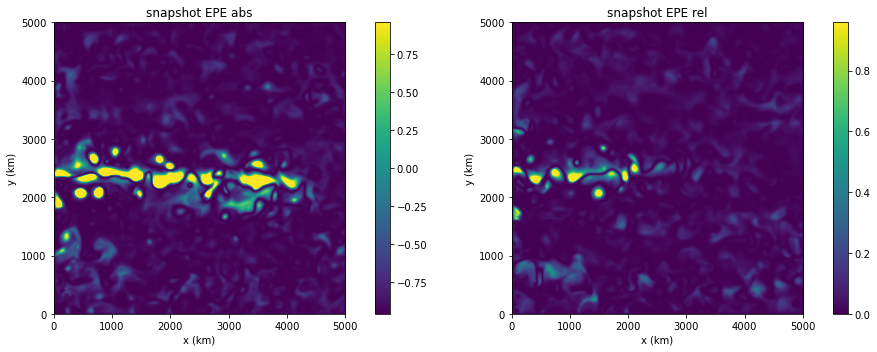

In [28]:
# snapshot EPE

epe_abs= b_p_abs[0]**2/N2[0]
epe_rel= b_p_rel[0]**2/N2[0]

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5),tight_layout=True)

maxi = max(np.max(epe_abs),np.abs(np.min(epe_abs)))

col1 = ax1.imshow( epe_abs, extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi/8, vmin = 0)
ax1.set_aspect('equal')
ax1.set_title('snapshot EPE abs')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')
m1 = plt.cm.ScalarMappable()
m1.set_array(epe_abs)
m1.set_clim(-maxi/8, maxi/8)
plt.colorbar(m1, ax= ax1 )#.set_label(r'$m^2.s^{-3}$')

col2 = ax2.imshow(epe_rel, extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi/8, vmin = 0)
ax2.set_aspect('equal')
ax2.set_title('snapshot EPE rel')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')
m2 = plt.cm.ScalarMappable()
m2.set_array(epe_rel)
m2.set_clim(0, maxi/8)
plt.colorbar(m2, ax= ax2 )



plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/plots_exp/figure_epe_p/snapshot_epe.png')

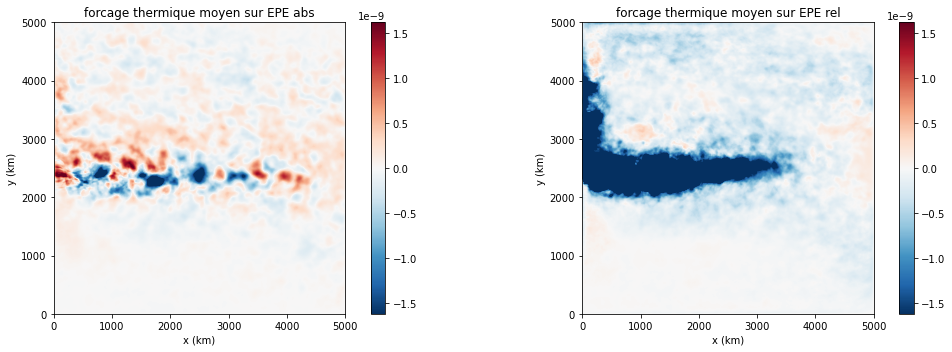

In [42]:
# forçage diabatique sur les perturbations

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5),tight_layout=True)

maxi = max(np.max(e_diab_abs[0]),np.abs(np.min(e_diab_abs[0])))

col1 = ax1.imshow( e_diab_abs[0], cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi/2, vmin = -maxi/2)
ax1.set_aspect('equal')
ax1.set_title('forcage thermique moyen sur EPE abs')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')
m1 = plt.cm.ScalarMappable(cmap='RdBu_r')
m1.set_array(e_diab_abs[0])
m1.set_clim(-maxi/2, maxi/2)
plt.colorbar(m1, ax= ax1 )#.set_label(r'$m^2.s^{-3}$')

col2 = ax2.imshow(e_diab_rel[0], cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi/2, vmin = -maxi/2)
ax2.set_aspect('equal')
ax2.set_title('forcage thermique moyen sur EPE rel')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')
m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(e_diab_rel[0])
m2.set_clim(-maxi/2, maxi/2)
plt.colorbar(m2, ax= ax2 )

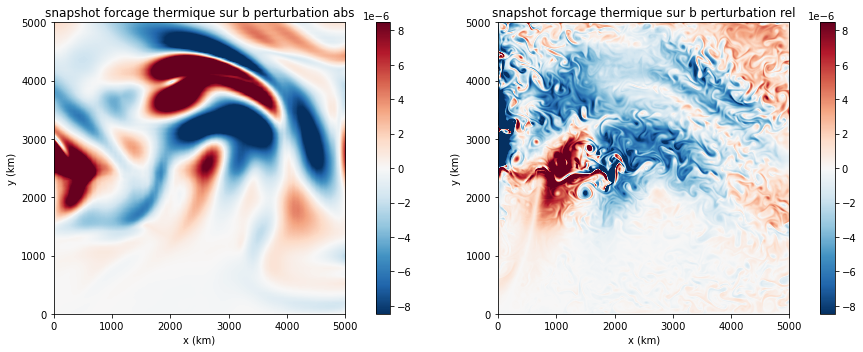

In [11]:
# forcage diabatique moyen sur les perturbations

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5),tight_layout=True)

maxi = max(np.max(diab_solo_p_abs),np.abs(np.min(diab_solo_p_abs)))

col1 = ax1.imshow( diab_solo_p_abs, cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi/4, vmin = -maxi/4)
ax1.set_aspect('equal')
ax1.set_title('snapshot forcage thermique sur b perturbation abs')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')
m1 = plt.cm.ScalarMappable(cmap='RdBu_r')
m1.set_array(diab_solo_p_abs)
m1.set_clim(-maxi/4, maxi/4)
plt.colorbar(m1, ax= ax1 )#.set_label(r'$m^2.s^{-3}$')

col2 = ax2.imshow(diab_solo_p_rel, cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi/4, vmin = -maxi/4)
ax2.set_aspect('equal')
ax2.set_title('snapshot forcage thermique sur b perturbation rel')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')
m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(diab_solo_p_rel)
m2.set_clim(-maxi/4, maxi/4)
plt.colorbar(m2, ax= ax2 )

plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/plots_exp/figure_epe_p/snapshot_diab_sur_b_p.png')

In [ ]:
fig, ((ax1,ax3),(ax2,ax4)) = plt.subplots(2, 2, figsize = (15,12),tight_layout=True)

maxi_sec = max(np.max(test_abs_sec),np.abs(np.min(test_abs_sec)))
maxi_prim = max(np.max(test_abs_prim),np.abs(np.min(test_abs_prim)))

col1 = ax1.imshow( test_abs_prim, cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi_prim/2, vmin = -maxi_prim/2)
ax1.set_aspect('equal')
ax1.set_title('primary terme abs')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')
m1 = plt.cm.ScalarMappable(cmap='RdBu_r')
m1.set_array(test_abs_prim)
m1.set_clim(-maxi_prim/2, maxi_prim/2)
plt.colorbar(m1, ax= ax1 )#.set_label(r'$m^2.s^{-3}$')

col2 = ax2.imshow( test_abs_sec, cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi_sec/4, vmin = -maxi_sec/4)
ax2.set_aspect('equal')
ax2.set_title('secondary terme abs')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')
m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(test_abs_sec)
m2.set_clim(-maxi_sec/4, maxi_sec/4)
plt.colorbar(m2, ax= ax2 )

col3 = ax3.imshow(test_rel_prim  , cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi_prim/2, vmin = -maxi_prim/2)
ax3.set_aspect('equal')
ax3.set_title('primary terme rel')
ax3.set_xlabel('x (km)')
ax3.set_ylabel('y (km)')
m3 = plt.cm.ScalarMappable(cmap='RdBu_r')
m3.set_array(test_rel_prim )
m3.set_clim(-maxi_prim/2, maxi_prim/2)
plt.colorbar(m3, ax= ax3 )

col4 = ax4.imshow( test_rel_sec, cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi_sec/4, vmin = -maxi_sec/4)
ax4.set_aspect('equal')
ax4.set_title('secondary terme rel')
ax4.set_xlabel('x (km)')
ax4.set_ylabel('y (km)')
m4 = plt.cm.ScalarMappable(cmap='RdBu_r')
m4.set_array(test_rel_sec)
m4.set_clim(-maxi_sec/4, maxi_sec/4)
plt.colorbar(m4, ax= ax4)

D'après cette figure, on voit qu'on ne peut pas associer (w_ek' Delta T ') à (w_ek Delta T )'

In [21]:
print('covariance w_ek et sst run absolu  (10ans):', cov_abs_i)
print('covariance w_ek et sst run relatif (10ans):', cov_rel_i)

covariance w_ek et sst run absolu  (10ans): -0.010539813421919795
covariance w_ek et sst run relatif (10ans): 0.10139768285515886


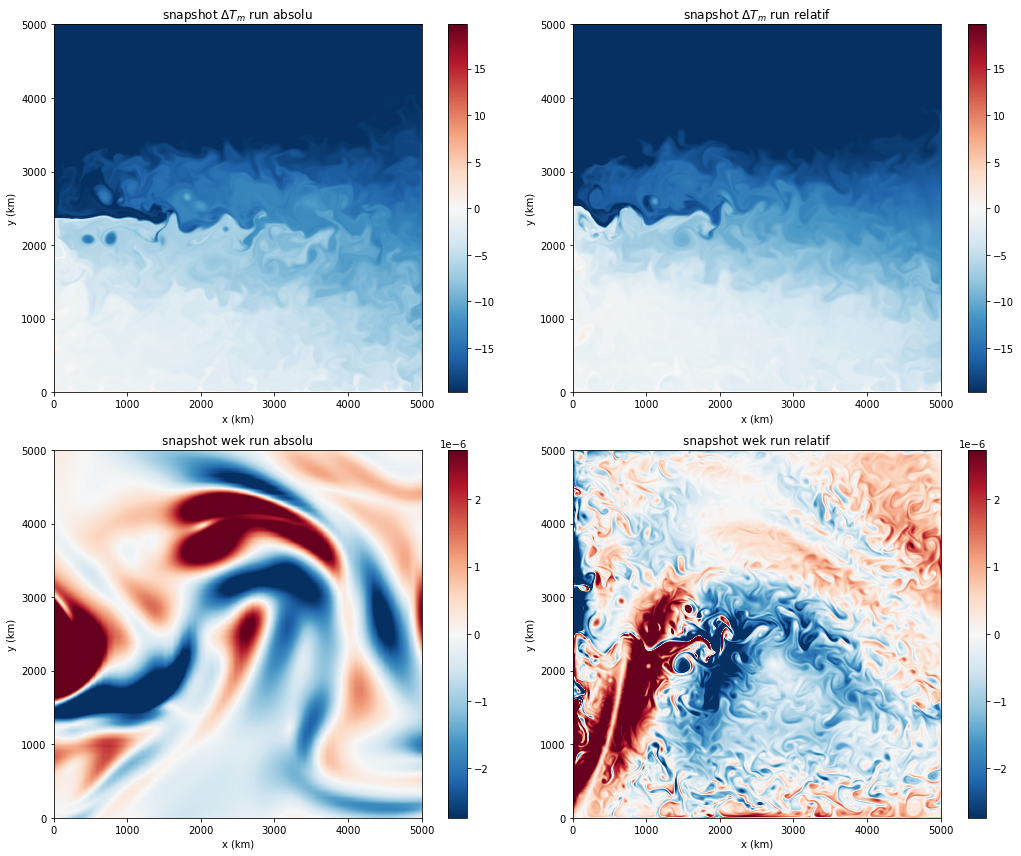

In [32]:
#snapshot sst et wekt

sst_p_abs_ins = qg.read_qgcm(forcing_b_abs, 50, 'sst',rescale = 1, interp=False)-toc[0]#-sst_me_abs-toc[0]
sst_p_rel_ins = qg.read_qgcm(forcing_b_rel, 50, 'sst',rescale = 1, interp=False)-toc[0]#-sst_me_rel-toc[0]
w_ek_p_abs_ins = qg.read_qgcm(forcing_b_abs, 50, 'wekt',rescale = 1, interp=False)# - w_ek_me_abs
w_ek_p_rel_ins = qg.read_qgcm(forcing_b_rel, 50, 'wekt',rescale = 1, interp=False)# - w_ek_me_rel


fig, ((ax1,ax3),(ax2,ax4)) = plt.subplots(2, 2, figsize = (15,12),tight_layout=True)

maxi_sst = max(np.max(sst_p_abs_ins-toc[0]),np.abs(np.min(sst_p_abs_ins-toc[0])))
maxi_w_ek = max(np.max(w_ek_p_abs_ins),np.abs(np.min(w_ek_p_abs_ins)))

col1 = ax1.imshow( sst_p_abs_ins, cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi_sst/2, vmin = -maxi_sst/2)
ax1.set_aspect('equal')
ax1.set_title(r'snapshot $\Delta T_m$ run absolu')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')
m1 = plt.cm.ScalarMappable(cmap='RdBu_r')
m1.set_array(sst_p_abs_ins)
m1.set_clim(-maxi_sst/2, maxi_sst/2)
plt.colorbar(m1, ax= ax1 )#.set_label(r'$m^2.s^{-3}$')

col2 = ax2.imshow( w_ek_p_abs_ins, cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi_w_ek/4, vmin = -maxi_w_ek/4)
ax2.set_aspect('equal')
ax2.set_title('snapshot wek run absolu')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')
m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(w_ek_p_abs_ins)
m2.set_clim(-maxi_w_ek/4, maxi_w_ek/4)
plt.colorbar(m2, ax= ax2 )

col3 = ax3.imshow(sst_p_rel_ins , cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi_sst/2, vmin = -maxi_sst/2)
ax3.set_aspect('equal')
ax3.set_title(r'snapshot $\Delta T_m$ run relatif')
ax3.set_xlabel('x (km)')
ax3.set_ylabel('y (km)')
m3 = plt.cm.ScalarMappable(cmap='RdBu_r')
m3.set_array(sst_p_rel_ins )
m3.set_clim(-maxi_sst/2, maxi_sst/2)
plt.colorbar(m3, ax= ax3 )

col4 = ax4.imshow( w_ek_p_rel_ins, cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi_w_ek/4, vmin = -maxi_w_ek/4)
ax4.set_aspect('equal')
ax4.set_title('snapshot wek run relatif')
ax4.set_xlabel('x (km)')
ax4.set_ylabel('y (km)')
m4 = plt.cm.ScalarMappable(cmap='RdBu_r')
m4.set_array(w_ek_p_rel_ins)
m4.set_clim(-maxi_w_ek/4, maxi_w_ek/4)
plt.colorbar(m4, ax= ax4)

plt.savefig('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/plots_exp/figure_epe_p/snapshot_termes.png')

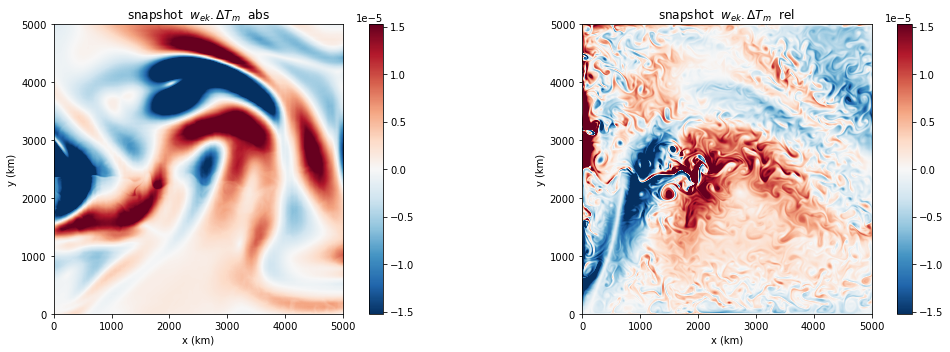

In [18]:
#snapshot sst et wekt

run_abs = w_ek_p_abs_ins*(sst_p_abs_ins-toc[0])/(toc[1]-toc[0])
run_rel = w_ek_p_rel_ins*(sst_p_rel_ins-toc[0])/(toc[1]-toc[0])


fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5),tight_layout=True)

maxi_abs = max(np.max(run_abs),np.abs(np.min(run_abs)))
maxi_rel = max(np.max(run_rel),np.abs(np.min(run_rel)))

col1 = ax1.imshow( run_abs, cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi_abs/4, vmin = -maxi_abs/4)
ax1.set_aspect('equal')
ax1.set_title(r'snapshot  $w_{ek}.\Delta T_m$  abs')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')
m1 = plt.cm.ScalarMappable(cmap='RdBu_r')
m1.set_array(run_abs)
m1.set_clim(-maxi_abs/4, maxi_abs/4)
plt.colorbar(m1, ax= ax1 )#.set_label(r'$m^2.s^{-3}$')

col2 = ax2.imshow(run_rel, cmap='RdBu_r', extent = [0,5000,0,5000],
                 origin='lower', vmax = maxi_abs/4, vmin = -maxi_abs/4)
ax2.set_aspect('equal')
ax2.set_title(r'snapshot  $w_{ek}.\Delta T_m$  rel')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')
m2 = plt.cm.ScalarMappable(cmap='RdBu_r')
m2.set_array(run_rel)
m2.set_clim(-maxi_abs/4, maxi_abs/4)
plt.colorbar(m2, ax= ax2 )


In [ ]:
#w_ek
maxi = max(np.max(w_ek_me_abs),np.abs(np.min(w_ek_me_abs)))
maxi_rel = max(np.max(w_ek_me_rel),np.abs(np.min(w_ek_me_rel)))

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,5),tight_layout=True)



col = ax1.imshow( w_ek_me_abs, cmap='RdBu_r', extent = [0,5000,0,5000], origin='lower', vmax = maxi/2, vmin = -maxi/2)
ax1.set_aspect('equal')
#ax1.set_title(r'Wind forcing term in $\overline{\overline{KE}}_t$')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('y (km)')

m = plt.cm.ScalarMappable(cmap='RdBu_r')
m.set_array(w_ek_me_abs)
m.set_clim(-maxi/2, maxi/2)
plt.colorbar(m, ax= ax1 )#.set_label(r'$m^2.s^{-3}$')

col_rel = ax2.imshow( w_ek_me_rel, cmap='RdBu_r', extent = [0,5000,0,5000], origin='lower', vmax = maxi_rel/10, vmin = -maxi_rel/10)
ax2.set_aspect('equal')
#ax1.set_title(r'Wind forcing term in $\overline{\overline{KE}}_t$')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')
ax2.grid()

m_rel = plt.cm.ScalarMappable(cmap='RdBu_r')
m_rel.set_array(w_ek_me_rel)
m_rel.set_clim(-maxi_rel/10, maxi_rel/10)
plt.colorbar(m_rel, ax= ax2 )#.set_label(r'$m^2.s^{-3}$')